# Lab4 The Multi-Layer Perceptron
## Team member
Rongwei Ji, Jonathan Mejia, Xiaoqing Zou
## Data introduction 
US Census Demographic Data
Data source: https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data/data

## Assigenment requriement:
 You will need to convert this from regression to four levels of classification by quantizing the variable of interest. 

## 1. Load, Split, and Balance

### 1.1 Prepare the data

In [104]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(1)


In [105]:
df = pd.read_csv('acs2017_census_tract_data.csv')
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [106]:
df.describe()

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.00000,73305.000000,73305.000000,73305.000000,...,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,2.839113e+10,4384.716017,2157.710707,2227.005311,17.265444,61.309043,13.28910,0.734047,4.753691,0.147341,...,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,1.647593e+10,2228.936729,1120.560504,1146.240218,23.073811,30.634461,21.60118,4.554247,8.999888,1.029250,...,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2903.000000,1416.000000,1465.000000,2.600000,38.000000,0.80000,0.000000,0.200000,0.000000,...,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,2.804700e+10,4105.000000,2007.000000,2082.000000,7.400000,70.400000,3.80000,0.000000,1.500000,0.000000,...,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,4.200341e+10,5506.000000,2707.000000,2803.000000,21.100000,87.700000,14.60000,0.400000,5.000000,0.000000,...,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,7.215375e+10,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.00000,100.000000,100.000000,71.900000,...,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

### Encoding 
In this dataset, only the state and country are the strings, we could do the encode make them numberic. 

In [108]:
df["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["State"] = le.fit_transform(df["State"])
df["State"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       39])

In [110]:
len(df["County"].unique())

1955

The county attribute has too many unique features to be a numberic, that will cost too much computing resources, we decide drop it.

In [111]:
df=df.drop(["County"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  int32  
 2   TotalPop          74001 non-null  int64  
 3   Men               74001 non-null  int64  
 4   Women             74001 non-null  int64  
 5   Hispanic          73305 non-null  float64
 6   White             73305 non-null  float64
 7   Black             73305 non-null  float64
 8   Native            73305 non-null  float64
 9   Asian             73305 non-null  float64
 10  Pacific           73305 non-null  float64
 11  VotingAgeCitizen  74001 non-null  int64  
 12  Income            72885 non-null  float64
 13  IncomeErr         72885 non-null  float64
 14  IncomePerCap      73256 non-null  float64
 15  IncomePerCapErr   73256 non-null  float64
 16  Poverty           73159 non-null  float6

<Axes: >

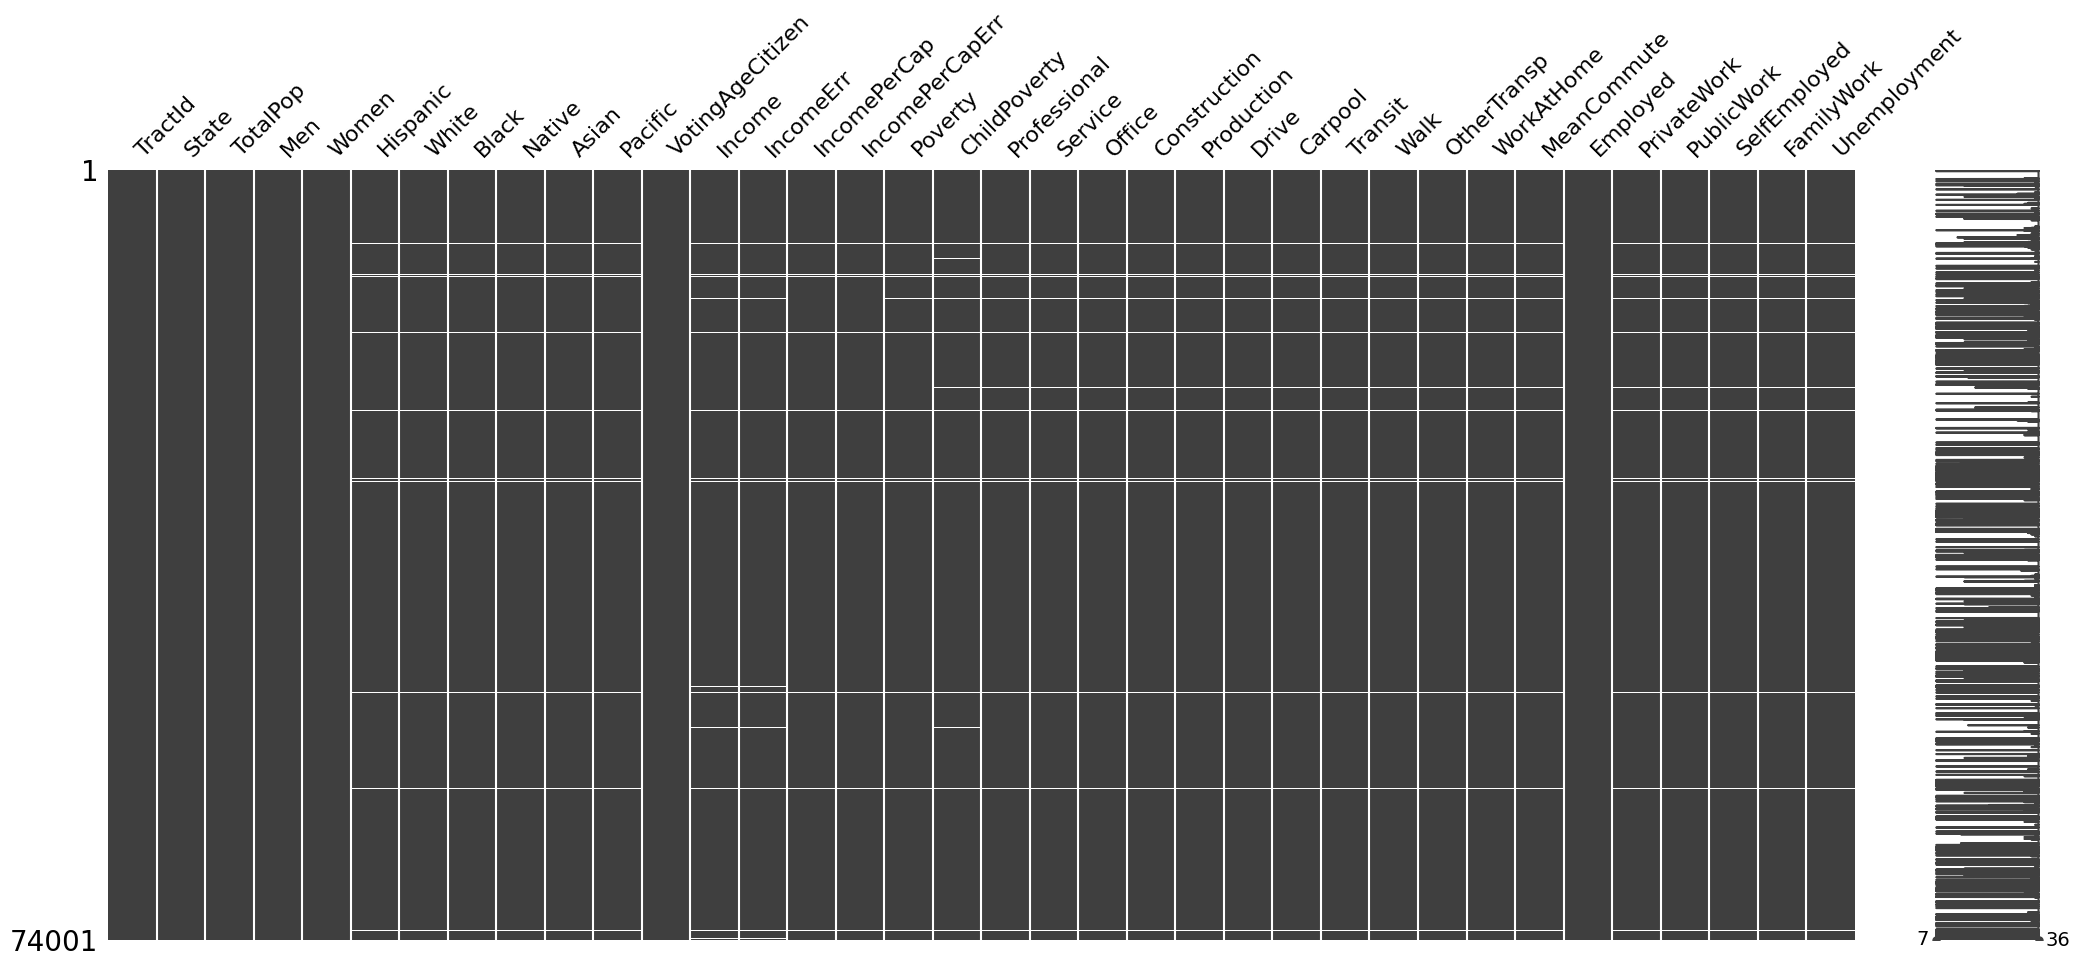

In [112]:
import missingno as msno
msno.matrix(df)
# check the missing data in the dataset

<Axes: >

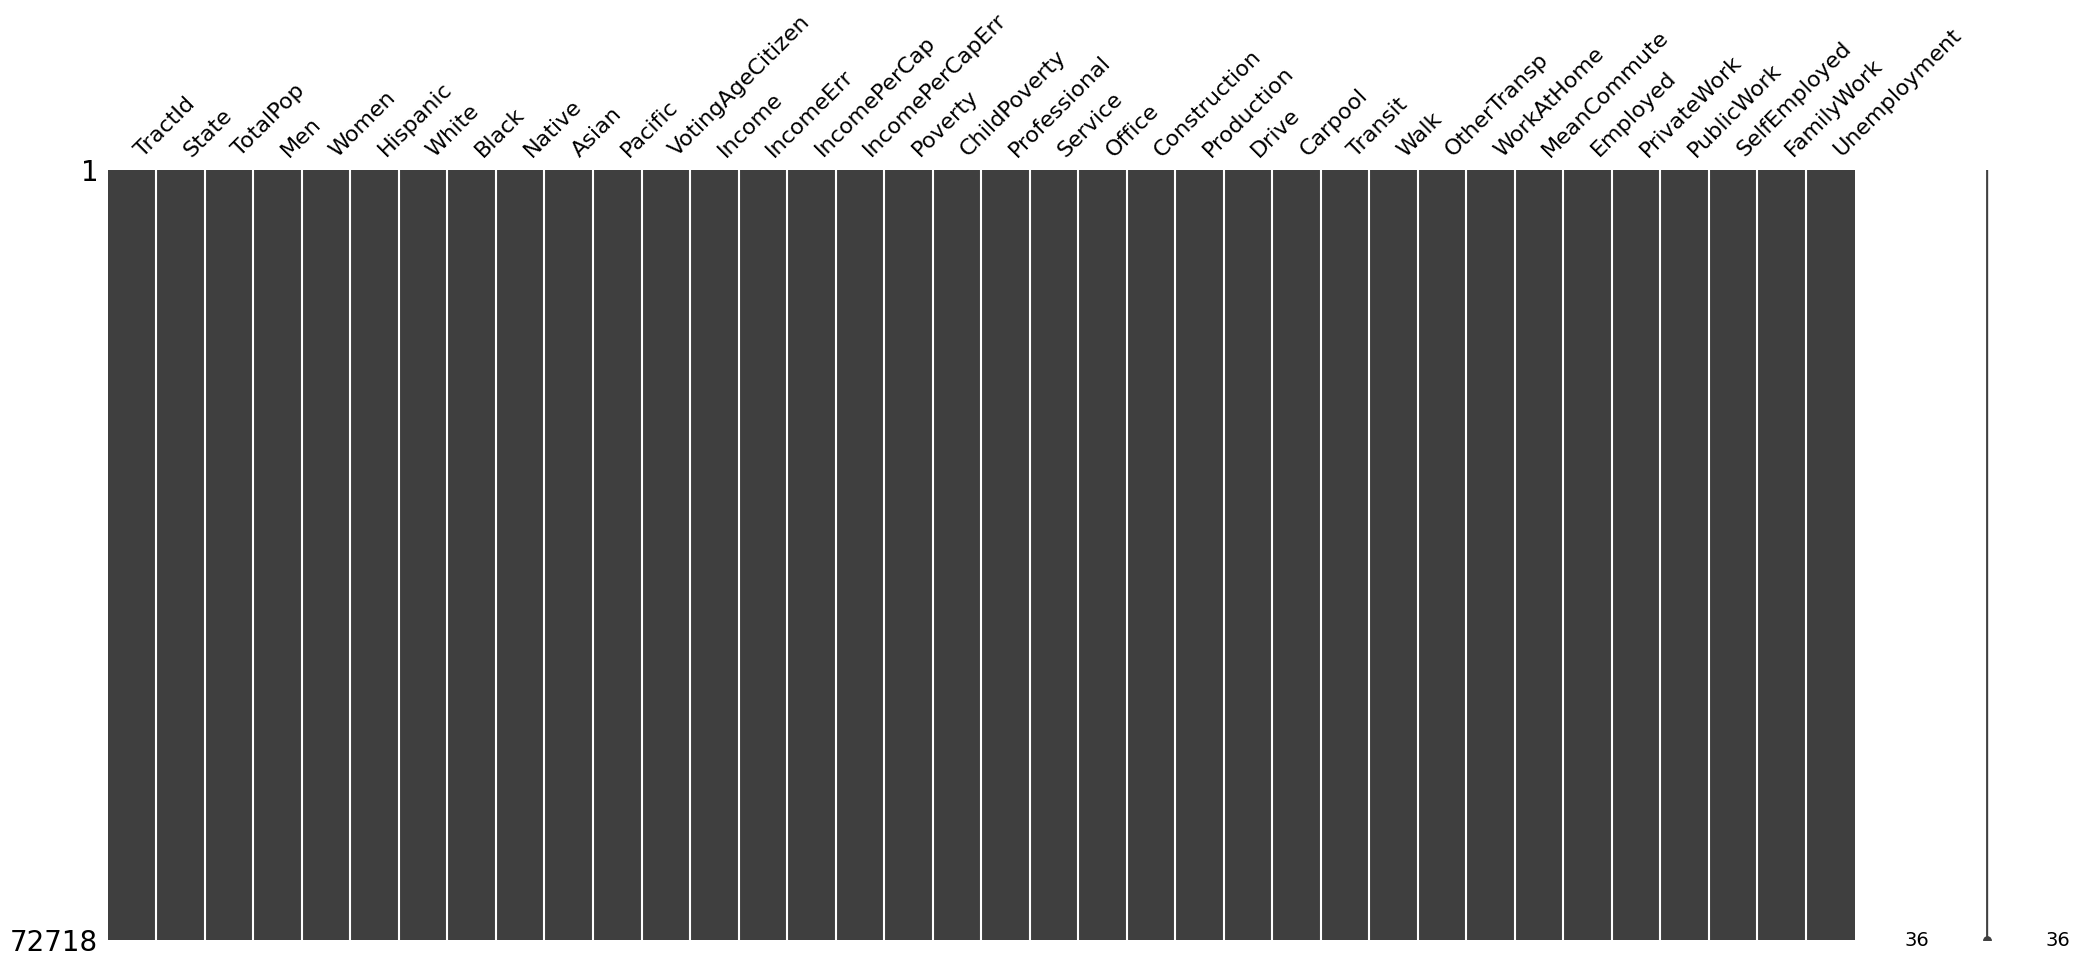

In [113]:
# we do not have missing data in the dataset, because we have enough data to do the analysis
df=df.dropna()
msno.matrix(df)

Summray for 1.1 Prepare the data

- Load the data.
- Obeservation of missingdata and Remove them, we have enough data to do something model training.
- Encode the states as integer.
- Removing the 'County', too many unique counry features and it could cost too much time to do computing.

### 1.2 Splite and Balance the dataset

In [114]:
### Splite and Balance the dataset

# consider to choose the quantization threshold for childpoverty

df["ChildPoverty"].describe()

count    72718.000000
mean        21.148476
std         18.572714
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64

[ 6.2 16.3 31.6 48.2 58.3 76.9]


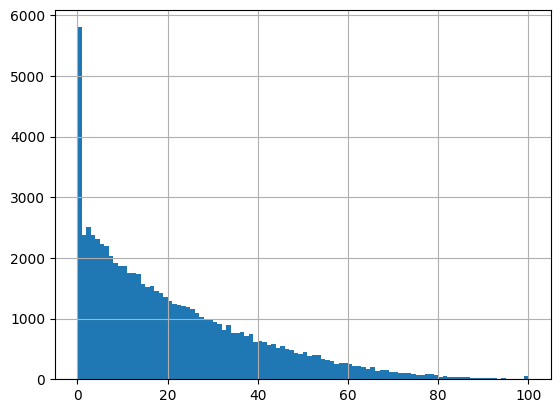

In [115]:
ax=df["ChildPoverty"].hist(bins=100)
print(np.percentile(df["ChildPoverty"],[25,50,75,90,95,99]))

We refer the information from https://www.census.gov/library/stories/2022/10/poverty-rate-varies-by-age-groups.html . The overall child poverty rate is 16.9% in 2021 , low-level child poverty rate is 8.2%, high-level child poverty is 27.7%. Since that we consider the three threshold: 8.2 ,16.9, 27.7 for the four classes


In [116]:
# cut the childpoverty into 4 quantiles ( 8.2 ,16.9, 27.7 )
from sklearn.model_selection import train_test_split
target_name="ChildPoverty"

y=df[target_name]
y=pd.cut(y,bins=[-1,8.2,16.9,27.7,100],labels=[0,1,2,3])
X=df.drop(["ChildPoverty"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("train size: ",X_train.shape)
print("test size: ",X_test.shape)


train size:  (58174, 35)
test size:  (14544, 35)


<Axes: >

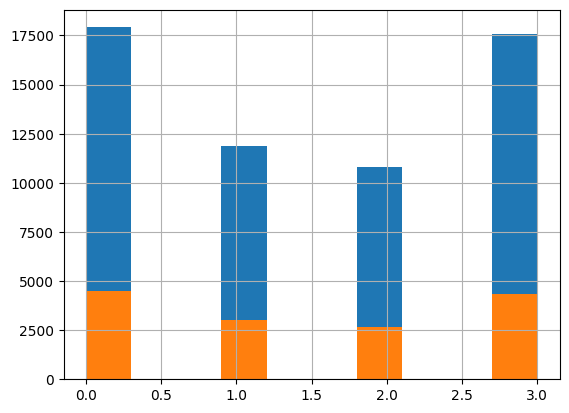

In [117]:
# consider the distribution of the target variable of four quantiles
y_train.hist()
y_test.hist()


In [118]:
# show the percentage of each quantile in the dataset in the training set and in the testing set
print("train set:")
print(y_train.value_counts(normalize=True))
print("test set:")
print(y_test.value_counts(normalize=True))


train set:
0    0.307990
3    0.302111
1    0.204043
2    0.185856
Name: ChildPoverty, dtype: float64
test set:
0    0.309268
3    0.299299
1    0.208883
2    0.182550
Name: ChildPoverty, dtype: float64


We can see the class distribution is imbalanced both in training data and testing data.
we could balance the training data for better accuracy about prediction

train size:  (71668, 35)
test size:  (14544, 35)


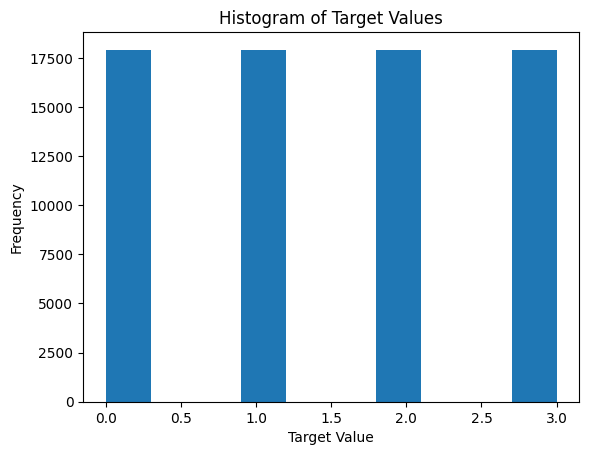

In [119]:
# balance the training set
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)
print("train size: ",X_train.shape)
print("test size: ",X_test.shape)
plt.hist(y_train, bins=10)  # Adjust the number of bins as needed
plt.title('Histogram of Target Values')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()
# take care about this part if your 3 thersholds is from 0 it will have error here, beaceuse somdate is not from 0


### Summary about 1.2
We find the data in train dataset is imbalance , it will result the accuracy issue and we do the balanced dataset to ensure the data is in a good condition for training. Avoiding the bias. 
Then we do the 80% for trianing and 20% for testing.

## 2 Pre-processing and Initial Modeling

### 2.1 Two layer perceptron

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [121]:
# two layer perceptron 

import numpy as np
from scipy.special import expit
import sys 
import pandas as pd

# from the class code
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        b1= np.zeros(self.n_hidden)
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        b2= np.zeros(self.n_output_)
        return W1, W2,b1,b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term


In [122]:


class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=100, eta=0.001, random_state=None,
                 alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
    
    
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1)) 
        W2[:,:1] = 0
        
        return W1, W2
    
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    
    
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()


        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):


            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)
                self.W1 -= self.eta * grad1
                self.W2 -= self.eta * grad2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self
    
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred






In [123]:

import matplotlib.pyplot as plt
%matplotlib inline

def cost_epochs(nx):
    cost_avgs = [np.mean(x) for x in nx.cost_]

    plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
    plt.ylabel('Cost')
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.show()

Using the example two-layer perceptron networ

In [124]:
params = dict(n_hidden=50, 
                C=0.1, # tradeoff L2 regularizer
              # tradeoff L2 regularizer C=0.1,
              epochs=180, # iterations
              eta=0.001,  # learning rate
              minibatches=len(X_train)/32, # minibatch size
              shuffle=True,
              random_state=1)

In [125]:
%%time
tt = TwoLayerPerceptron(**params) # first model tt 
tt.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=10)
yhat = tt.predict(X_test.to_numpy())
accuracy_model1 = accuracy_score(y_test.to_numpy(),yhat)
print('Accuracy:',accuracy_model1)

Epoch: 180/180

Accuracy: 0.2992986798679868
CPU times: total: 1min 3s
Wall time: 1min 10s


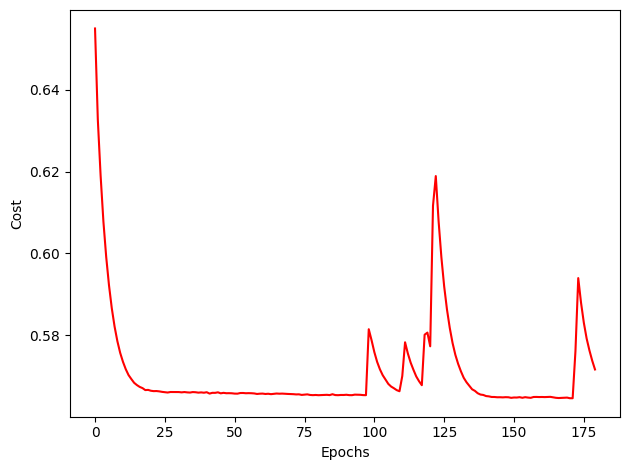

In [126]:
cost_epochs(tt)

### 2.2 normalize the continuous numeric feature data.

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm_features = [col for col in X_train.columns if col != 'State']

X_train[norm_features] = scaler.fit_transform(X_train[norm_features])
X_test[norm_features] = scaler.fit_transform(X_test[norm_features])

In [128]:
%%time
nn_norm = TwoLayerPerceptron(**params)
nn_norm.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=10)
yhat_norm = nn_norm.predict(X_test.to_numpy())
accuracy_mode_norm = accuracy_score(y_test.to_numpy(),yhat_norm)
print('Accuracy:',accuracy_mode_norm)

Epoch: 180/180

Accuracy: 0.6877062706270627
CPU times: total: 1min 31s
Wall time: 1min 41s


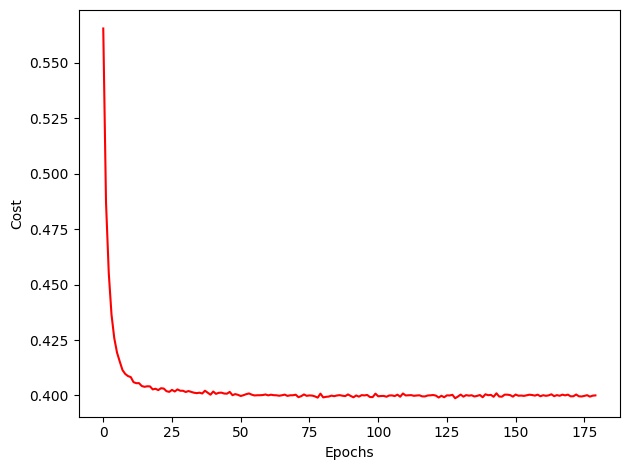

In [129]:
cost_epochs(nn_norm)

### 2.3 normalize the continuous numeric feature data AND (2) one hot encode the categorical data

In [130]:
onehotencode = pd.get_dummies(X_train['State'])
X_train = X_train.drop(['State'],axis = 1)
X_train = pd.concat([onehotencode, X_train], axis=1)

onehotencode = pd.get_dummies(X_test['State'])
X_test = X_test.drop(['State'],axis = 1)
X_test= pd.concat([onehotencode, X_test], axis=1)

In [131]:
%%time
nn_norm_encode = TwoLayerPerceptron(**params)
nn_norm_encode.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=10)
yhat_norm_encode = nn_norm_encode.predict(X_test.to_numpy())
accuracy_model3 = accuracy_score(y_test.to_numpy(),yhat_norm_encode)
print('Accuracy:',accuracy_model3)

Epoch: 180/180

Accuracy: 0.7031078107810781
CPU times: total: 1min 48s
Wall time: 1min 56s


In [132]:
# compare the accuracy of tt and nn_norm and nn_norm_encode
print('Accuracy of tt:',accuracy_model1)
print('Accuracy of nn_norm:',accuracy_mode_norm)
print('Accuracy of nn_norm_encode:',accuracy_model3)




Accuracy of tt: 0.2992986798679868
Accuracy of nn_norm: 0.6877062706270627
Accuracy of nn_norm_encode: 0.7031078107810781


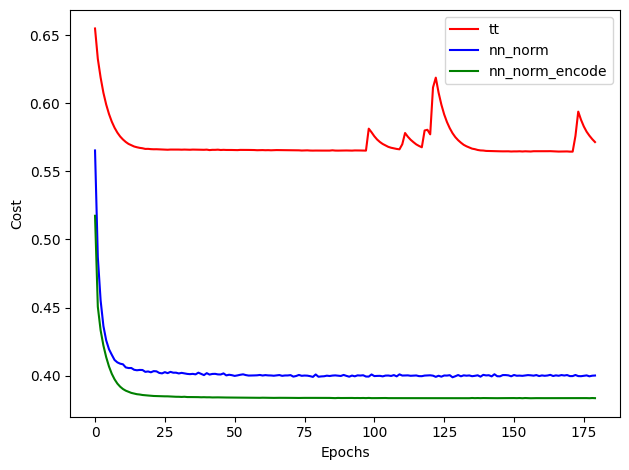

In [136]:
# draw the polf of the three models, the plots is the Epohs and the cost of the three models
# compare them in the same plot
cost_avgs_tt = [np.mean(x) for x in tt.cost_]
cost_avgs_nn_norm = [np.mean(x) for x in nn_norm.cost_]
cost_avgs_nn_norm_encode = [np.mean(x) for x in nn_norm_encode.cost_]

plt.plot(range(len(cost_avgs_tt)), cost_avgs_tt, color='red',label='tt')
plt.plot(range(len(cost_avgs_nn_norm)), cost_avgs_nn_norm, color='blue',label='nn_norm')
plt.plot(range(len(cost_avgs_nn_norm_encode)), cost_avgs_nn_norm_encode, color='green',label='nn_norm_encode')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.legend()
plt.tight_layout()
plt.show()



## Multi Layer

In [140]:
params = dict(n_hiddens=[50,50,50,50], # 4 layer
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              minibatches= 50, # minibatch size
              shuffle=True,
              random_state=1)

params

{'n_hiddens': [50, 50, 50, 50],
 'C': 0.1,
 'epochs': 200,
 'eta': 0.001,
 'minibatches': 50,
 'shuffle': True,
 'random_state': 1}

In [141]:
# run the multi-layer perceptron first
nn_4 = MultiLayerPerceptronAdaptive(**params)

nn_4.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=50)
yhat = nn_4.predict(X_test.to_numpy())
print('Accuracy:',accuracy_score(y_test.to_numpy(),yhat))

Epoch: 200/200

Accuracy: 0.7129400440044005


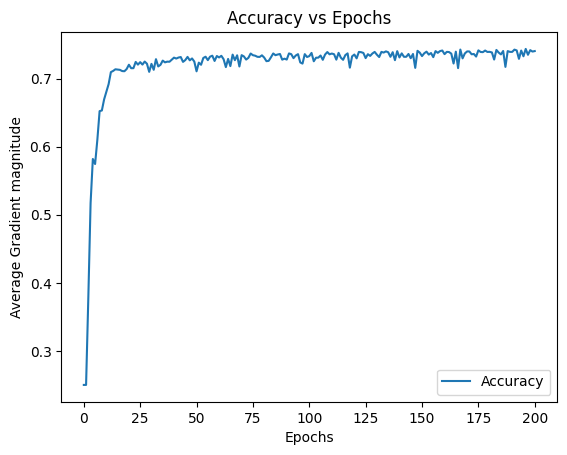

In [142]:
plt.plot(nn_4.score_, label='Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.ylabel('Average Gradient magnitude')
plt.xlabel('Epochs')
plt.show()

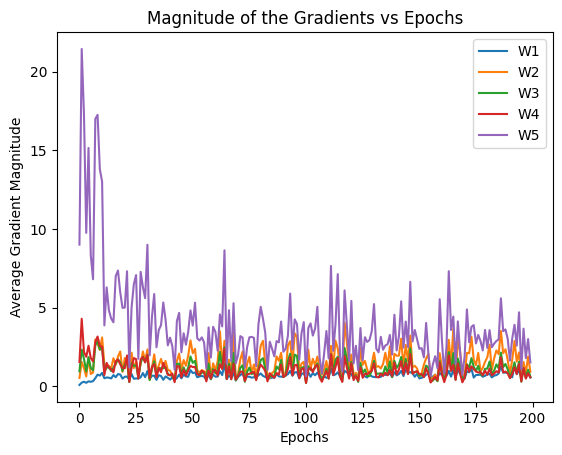

In [144]:
ax = plt.subplot(1,1,1)
for idx in range(len(nn_4.grad_W_list)):
    plt.plot(abs(nn_4.grad_W_list[idx]), label='W{}'.format(str(idx+1)))
plt.legend()
plt.title('Magnitude of the Gradients vs Epochs')
plt.ylabel('Average Gradient Magnitude')
plt.xlabel('Epochs')
plt.show()

In [145]:
# get the nn_3 model which 3 layer and nn_4 model which 4 layer
params3 = dict(n_hiddens=[50,50,50], # 3 layer
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              minibatches= 50, # minibatch size
              shuffle=True,
              random_state=1)
nn_3 = MultiLayerPerceptronAdaptive(**params3)
nn_3.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=50)
yhat = nn_3.predict(X_test.to_numpy())
print('Accuracy:',accuracy_score(y_test.to_numpy(),yhat))


Epoch: 200/200

Accuracy: 0.7178905390539054


In [146]:
params5= dict(n_hiddens=[50,50,50,50,50], # 5 layer
                C=0.1, # tradeoff L2 regularizer
                epochs=200, # iterations
                eta=0.001,  # learning rate
                minibatches= 50, # minibatch size
                shuffle=True,
                random_state=1)

nn_5 = MultiLayerPerceptronAdaptive(**params5)
nn_5.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=50)
yhat = nn_5.predict(X_test.to_numpy())
print('Accuracy:',accuracy_score(y_test.to_numpy(),yhat))


Epoch: 200/200

Accuracy: 0.7035891089108911


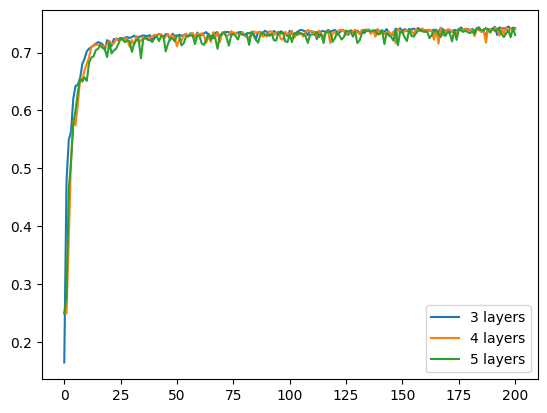

In [147]:
# compare the accuracy of 3 layer and 4 layer and 5 layer model
# nn_3, nn_4, nn_5
# compare nn_3, nn_4, nn_5 accuracy and epoch plot
plt.plot(nn_3.score_, label='3 layers')
plt.plot(nn_4.score_, label='4 layers')
plt.plot(nn_5.score_, label='5 layers')
plt.legend()



We establish a model comprising four layers, each with 50 units. Despite maintaining identical hyperparameters to the three-layer model, our four-layer model yields lower accuracy.

Gradient vanishing occurs when the gradients become extremely small during the backpropagation process, effectively hindering weight updates and impeding learning. This issue is often encountered when using activation functions like the sigmoid function, particularly in deep neural networks with many layers.

Analyzing the graph provided, we observe a consistent pattern in the relationship between gradient and layer, akin to the three-layer model. Specifically, W4 surpasses W3 and W2 in magnitude. W3 exhibits higher values compared to W2, with the latter two being relatively similar. This alignment corresponds with our hypothesis that layers nearer to the output exhibit more effective learning, whereas those nearer to the input learn at a slower pace.

## 3.4 Adaptive learning 

In [148]:
import numpy as np
from scipy.special import expit
import sys
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [149]:
import numpy as np
import pandas as pd
from scipy.special import expit
from sklearn.metrics import accuracy_score
import sys

class MultiLayerPerceptronAdaptive:
    def __init__(self, n_hiddens=[16, 10], C=0.1, epochs=100, eta=0.001, random_state=1,
                 alpha=0.1, decrease_const=0.0001, shuffle=True, minibatches=1, adaptive_method=0):
        np.random.seed(random_state)
        self.n_hiddens = n_hiddens
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.adaptive_method = adaptive_method

    def _initialize_weights(self):
        layers = self.n_hiddens.copy()
        layers.append(self.n_output_)
        W_list = []
        features = self.n_features_
        for idx, size_hidden in enumerate(layers):
            init_bound = 4 * np.sqrt(6. / (size_hidden + features + 1))
            W = np.random.uniform(-init_bound, init_bound, (size_hidden, features + 1))
            W[:, :1] = 0
            features = size_hidden
            W_list.append(W)
        return W_list

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
        return onehot

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        return expit(z)

    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    @staticmethod
    def _L2_reg(lambda_, W_list):
        """Compute L2-regularization cost"""
        weights = 0
        for W in W_list:
            weights += np.mean(W[:, 1:] ** 2)
        return (lambda_ / 2.0) * np.sqrt(weights)

    def _cost(self, output, Y_enc, W_list):
        '''over write cost function'''
        cost = np.mean((Y_enc - output) ** 2)
        L2_term = self._L2_reg(self.l2_C, W_list)
        return cost + L2_term

    def _feedforward(self, X, w_list):
        """Compute feedforward step"""
        A_list = []
        Z_list = []
        for i, W in enumerate(w_list):
            if i == 0:
                A = self._add_bias_unit(X.T, how='row')
            else:
                A = self._sigmoid(Z)
                A = self._add_bias_unit(A, how='row')
            Z = W @ A
            A_list.append(A)
            Z_list.append(Z)
        A_output = self._sigmoid(Z)
        A_list.append(A_output)
        return A_list, Z_list

    def _get_gradient(self, A_list, Z_list, y, w_list):
        g_list = []
        A_last = A_list[-1]
        V_last = -2 * (y - A_last) * A_last * (1 - A_last)
        i = 1
        length = len(w_list)
        for A, W in zip(A_list[:-1][::-1], w_list[::-1]):
            if i == 1:
                grad = V_last @ A.T
                V = W.T @ V_last
            else:
                grad = V_last[1:, :] @ A.T
                if i != length:
                    V = (W.T @ V_last[1:, :])
            if length - 1 - i >= 0:
                V = A * (1 - A) * V
                V_last = V
            grad[:, 1:] += W[:, 1:] * self.l2_C
            g_list.append(grad)
            i += 1
        return g_list[::-1]

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W_list = self._initialize_weights()
        W_pre_list = [np.zeros(W.shape) for W in self.W_list]

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        len_layers = len(self.n_hiddens)
        self.grad_W_list = []
        rho_W_prev = []


        # adaptive method RMSprop and AdaDelta 
        # adpative method 0 is normal gradient descent
        # adaptive method 1 is RMSprop
        # adaptive method 2 is AdaM  
        if self.adaptive_method == 2:  # AdaM
            for idx in range(len(self.W_list)):
                rho_W_prev.append(np.zeros(self.W_list[idx].shape))

        for i in range(len_layers + 1):
            self.grad_W_list.append(np.zeros(self.epochs, dtype=float))

        for i in range(self.epochs):
            if self.adaptive_method == 1 or self.adaptive_method == 2:
                eta = self.eta ** (1 + self.decrease_const * i)
                eta = max(eta, self.eta / 1000)

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for j in mini:
                A_list, Z_list = self._feedforward(X_data[j], self.W_list)
                cost = self._cost(A_list[-1], Y_enc[:, j], self.W_list)
                mini_cost.append(cost)

                g_list = self._get_gradient(A_list, Z_list, Y_enc[:, j], self.W_list)

                for idx in range(len(self.W_list)):
                    if self.adaptive_method == 0:
                        self.W_list[idx] -= self.eta * g_list[idx]
                    if self.adaptive_method == 1 or self.adaptive_method == 2:
                        self.W_list[idx] -= eta * g_list[idx]
                    if self.adaptive_method == 2:
                        rho_W = eta * g_list[idx]
                        self.W_list[idx] -= (rho_W + (self.alpha * rho_W_prev[idx]))
                        rho_W_prev[idx] = rho_W

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))

            for m in range(len(self.grad_W_list)):
                self.grad_W_list[m][i] += np.mean(abs(g_list[m]))
        return self

    def predict(self, X):
        """Predict class labels"""
        a_list, _ = self._feedforward(X, self.W_list)
        y_pred = np.argmax(a_list[-1], axis=0)
        return y_pred





        

In [150]:
params = dict(n_hiddens=[50,50,50,50], # 4 layer
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              minibatches= 50, # minibatch size
              shuffle=True,
              random_state=1,
              adaptive_method = 1  # RMSprop
              )

params

{'n_hiddens': [50, 50, 50, 50],
 'C': 0.1,
 'epochs': 200,
 'eta': 0.001,
 'minibatches': 50,
 'shuffle': True,
 'random_state': 1,
 'adaptive_method': 1}

In [151]:
%%time
nn_ad = MultiLayerPerceptronAdaptive(**params)

nn_ad.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=50)
yhat = nn_ad.predict(X_test.to_numpy())
print('Accuracy:',accuracy_score(y_test.to_numpy(),yhat))

Epoch: 200/200

Accuracy: 0.7134213421342134
CPU times: total: 2min 10s
Wall time: 4min 5s


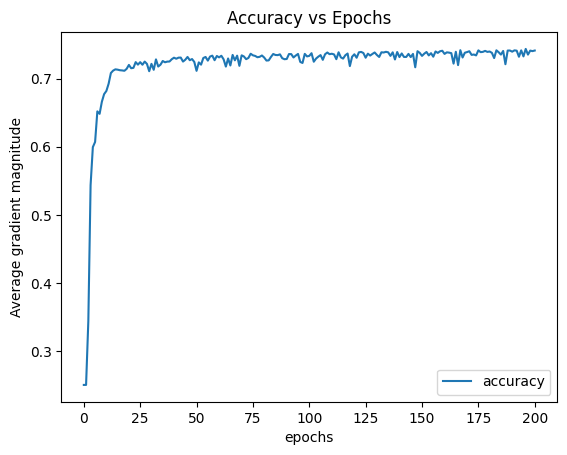

In [152]:
plt.plot(nn_ad.score_, label='accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.ylabel('Average gradient magnitude')
plt.xlabel('epochs')
plt.show()

In [153]:
# perform the Cross-validation paired t-test to compare the two models
# compare with adaptive or not .
from scipy import stats

def paired_t_test(model1, model2):
    t_stat, p_value = stats.ttest_rel(model1, model2)
    return t_stat, p_value

# paired t-test
t_stat, p_value = paired_t_test(nn_4.score_, nn_ad.score_)
print('t-statistic:', t_stat)
print('p-value:', p_value)





t-statistic: -2.3435553149135333
p-value: 0.02008266549900998


The t-statistic indicates that the sample mean is 2.551 standard errors away from the null hypothesis mean.
The p-value of 0.0115 suggests that there is evidence against the null hypothesis at the 5% significance level (assuming a common significance level of 0.05). This indicates that the result is statistically significant, and we reject the null hypothesis in favor of the alternative hypothesis.

In [ ]:
# Bootstrap Resampling method to compared different models
from sklearn.utils import resample
import numpy as np

def bootstrap_resampling(model1, model2, n_iterations=1000):
    scores1 = np.array(model1)
    scores2 = np.array(model2)
    stats = list()
    for _ in range(n_iterations):
        scores1_sample = resample(scores1, replace=True, n_samples=len(scores1))
        scores2_sample = resample(scores2, replace=True, n_samples=len(scores2))
        t_stat, p_value = paired_t_test(scores1_sample, scores2_sample)
        stats.append((t_stat, p_value))
    return stats

# bootstrap resampling
stats = bootstrap_resampling(nn_4.score_, nn_ad.score_)
stats = np.array(stats)
t_stat = stats[:, 0]
p_value = stats[:, 1]
print('t-statistic:', np.mean(t_stat))
print('p-value:', np.mean(p_value))


t-statistic: 0.8156439264606186
p-value: 0.3882583005989079


In this case, the average t-statistic (0.8156) suggests that there is some difference between the performance scores of the two models.

Conversely, a high p-value suggests that the observed difference is not statistically significant, indicating that it could have occurred due to random variability.

In [ ]:
# Chi-Square test 
from scipy.stats import chi2_contingency

def chi_square_test(model1, model2):
    table = np.array([model1, model2])
    stat, p, dof, expected = chi2_contingency(table)
    return stat, p

# chi-square test
stat, p = chi_square_test(nn_4.score_, nn_ad.score_)
print('Chi-square statistic:', stat)
print('p-value:', p)



Chi-square statistic: 0.14061628073279908
p-value: 1.0


# 4. Exceptional Work (AdaM)

In [155]:
params_a_m = dict(n_hiddens=[50,50,50,50], # 4 layer
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              minibatches= 50, # minibatch size
              shuffle=True,
              random_state=1,
              adaptive_method = 2
              )

params_a_m

{'n_hiddens': [50, 50, 50, 50],
 'C': 0.1,
 'epochs': 200,
 'eta': 0.001,
 'minibatches': 50,
 'shuffle': True,
 'random_state': 1,
 'adaptive_method': 2}

In [156]:
%%time

nn_adm = MultiLayerPerceptronAdaptive(**params_a_m)

nn_adm.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=50)
yhat_a_m = nn_adm.predict(X_test.to_numpy())
test_acc_a_m = accuracy_score(y_test.to_numpy(),yhat_a_m)
print('Accuracy:',test_acc_a_m)

Epoch: 200/200

Accuracy: 0.7117711771177118
CPU times: total: 2min 16s
Wall time: 4min 4s


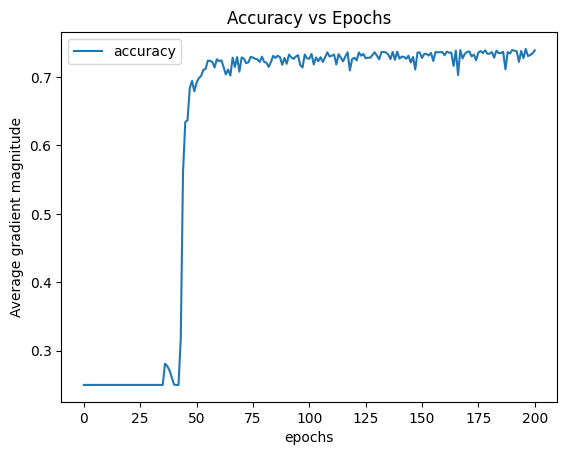

In [157]:
plt.plot(nn_adm.score_, label='accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.ylabel('Average gradient magnitude')
plt.xlabel('epochs')
plt.show()

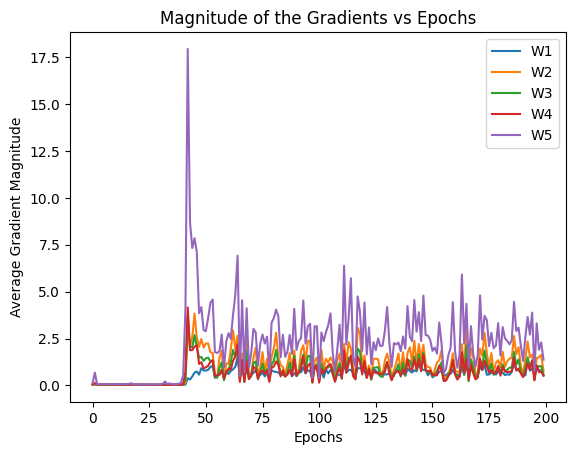

In [158]:
for idx in range(len(nn_adm.grad_W_list)):
    plt.plot(abs(nn_adm.grad_W_list[idx]), label='W{}'.format(str(idx+1)))
plt.legend()
plt.title('Magnitude of the Gradients vs Epochs')
plt.ylabel('Average Gradient Magnitude')
plt.xlabel('Epochs')
plt.show()

In [164]:
# using the t-test to compare the two models
t_stat, p_value = paired_t_test(nn_ad.score_, nn_adm.score_)
print('t-statistic:', t_stat)
print('p-value:', p_value)



t-statistic: 7.851245220827447
p-value: 2.456542036602682e-13


In summary, a t-statistic of 7.851 with an extremely low p-value suggests a strong and statistically significant difference between the two models being compared.

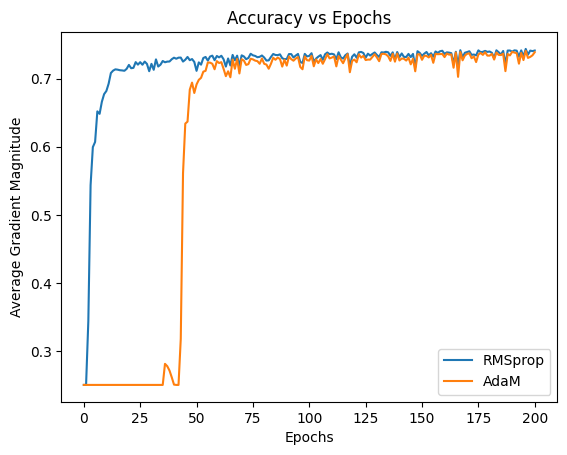

In [176]:
#compare the iteration and avaerage gradient magnitude of the two models
plt.plot(nn_ad.score_, label='RMSprop')
plt.plot(nn_adm.score_, label='AdaM')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.ylabel('Average Gradient Magnitude')
plt.xlabel('Epochs')
plt.show()








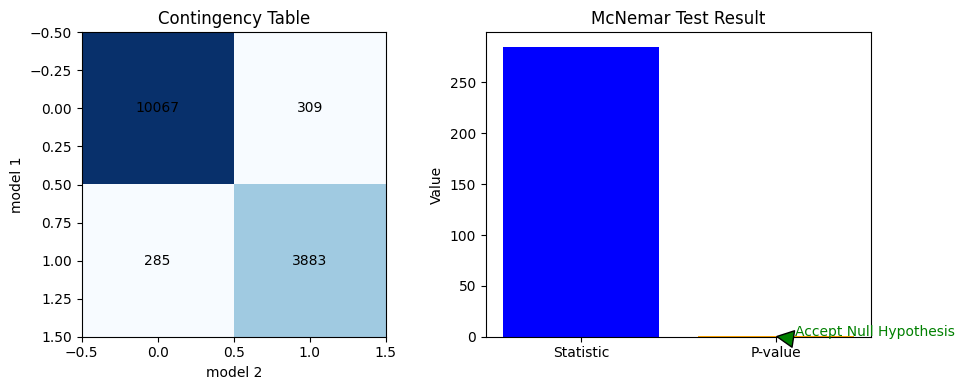

In [182]:
# using the McNemar test to compare the two models
def create_contingency_McNemar(y_test, model1_pred, model2_pred):
    table = np.zeros((2, 2), dtype=int)

    for true_label, pred1, pred2 in zip(y_test, model1_pred, model2_pred):
        correct1_correct2 = pred1 == true_label and pred2 == true_label
        correct1_wrong2 = pred1 == true_label and pred2 != true_label
        wrong1_correct2 = pred1 != true_label and pred2 == true_label
        wrong1_wrong2 = pred1 != true_label and pred2 != true_label

        table[0][0] += correct1_correct2
        table[0][1] += correct1_wrong2
        table[1][0] += wrong1_correct2
        table[1][1] += wrong1_wrong2

    return table

import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar

def plot_mcnemar_result(model1_name, model2_name, temp_table, result):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Plot contingency table
    ax1 = axes[0]
    ax1.imshow(temp_table, cmap='Blues', interpolation='nearest')
    ax1.set_title('Contingency Table')
    ax1.set_xlabel(model2_name)
    ax1.set_ylabel(model1_name)
    for i in range(2):
        for j in range(2):
            ax1.text(j, i, str(temp_table[i, j]), ha='center', va='center')

    # Plot McNemar test result
    ax2 = axes[1]
    ax2.bar(['Statistic', 'P-value'], [result.statistic, result.pvalue], color=['blue', 'orange'])
    ax2.set_title('McNemar Test Result')
    ax2.set_ylabel('Value')

    # Annotate p-value significance
    if result.pvalue < 0.05:
        ax2.annotate('Reject Null Hypothesis', xy=(1, result.pvalue), xytext=(1.1, result.pvalue + 0.05),
                     arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')
    else:
        ax2.annotate('Accept Null Hypothesis', xy=(1, result.pvalue), xytext=(1.1, result.pvalue + 0.05),
                     arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color='green')

    plt.tight_layout()
    plt.show()

# Comparison between model 1 and model 2
temp_table = create_contingency_McNemar(y_test.to_numpy(), yhat, yhat_a_m)
result = mcnemar(temp_table, exact=True)
plot_mcnemar_result('model 1', 'model 2', temp_table, result)



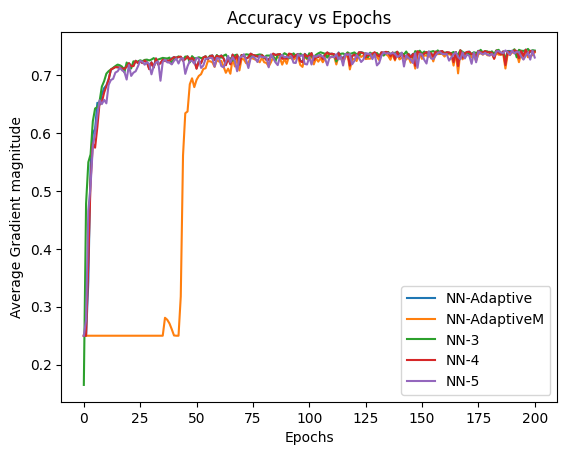

In [184]:
# show tt, nn_ad, nn_adm, nn_3, nn_4, nn_5 accuracy and epoch plot

plt.plot(nn_ad.score_, label='NN-Adaptive')
plt.plot(nn_adm.score_, label='NN-AdaptiveM')
plt.plot(nn_3.score_, label='NN-3')
plt.plot(nn_4.score_, label='NN-4')
plt.plot(nn_5.score_, label='NN-5')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.ylabel('Average Gradient magnitude')
plt.xlabel('Epochs')
plt.show()
